# Imports

In [57]:
import json
import pandas as pd
import os

# Schema

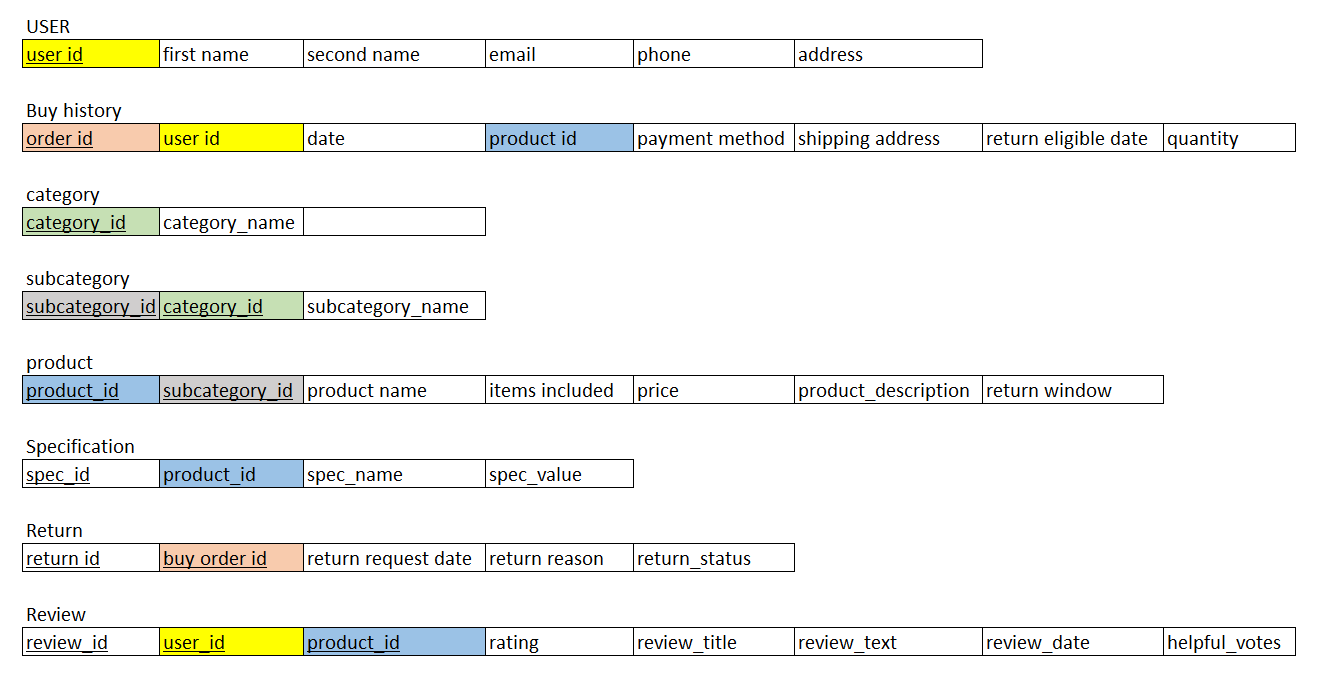

In [9]:
from IPython.display import Image, display

# Load and display a PNG image
image_path = "schema.png"  # Using schema.png which exists in the current directory
display(Image(filename=image_path))


# Checking the quality of data

In [10]:
def load_json(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        return data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found")
        return None
    except json.JSONDecodeError:
        print(f"Error: File '{file_path}' contains invalid JSON")
        return None

In [11]:
pwd

'D:\\Study\\Programs\\TSAI\\EAG_V1_CAPESTONE\\dev_docs'

In [52]:
user_df = pd.read_json(os.path.join("data", "final_data", "user.json"))
buy_history_df = pd.read_json(os.path.join("data", "final_data", "buy_history.json"))
category_df = pd.read_json(os.path.join("data", "final_data", "category.json"))
subcategory_df = pd.read_json(os.path.join("data", "final_data", "subcategory.json"))
product_df = pd.read_json(os.path.join("data", "final_data", "product.json"))
specification_df = pd.read_json(os.path.join(r"data", "final_data", "specification.json"))
return_history_df = pd.read_json(os.path.join(r"data", "final_data", "return_history.json"))
review_df = pd.read_json(os.path.join(r"data", "final_data", "review.json"))

In [15]:
# # INNER JOIN (only rows with matching product_id in both tables)
# inner_join = pd.merge(left, right, on="product_id", how="inner")

### <u>Buying History</u>

#### user_id

In [38]:
# I want unique user_id from table user_df in a list
unique_user_ids_user_df = user_df['user_id'].unique().tolist()
unique_user_ids_buy_history = buy_history_df['user_id'].unique().tolist()

if len(unique_user_ids_user_df) == len(unique_user_ids_buy_history):
    print("All user_id are matching")

print(unique_user_ids_user_df)
print(unique_user_ids_buy_history)

All user_id are matching
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


#### product_id

In [43]:
product_ids_buy_df = buy_history_df['product_id'].unique().tolist()
product_ids_product_df = product_df['product_id'].unique().tolist()

if len(product_ids_buy_df) == len(product_ids_product_df):
    print("All user_id are matching")
else:
    print("Not all user_id are matching")
    print("proceed with second check")

    """ check if product_id in buy_history_df is in product_df"""
    for b_poi in product_ids_buy_df:
        if b_poi not in product_ids_product_df:
            print(f"b_poi: {b_poi} not in product_ids_product_df")

Not all user_id are matching
proceed with second check


### <u>Subcategory</u>

In [46]:
cat_id_1 = subcategory_df['category_id'].unique().tolist()
cat_id_2 = category_df['category_id'].unique().tolist()

for  cid1 in cat_id_1:
    if cid1 not in cat_id_2:
        print(f"cat_id_1: {cid1} not in cat_id_2")

### <u>Product</u>

In [48]:
subcat_id_1 = product_df['subcategory_id'].unique().tolist()
subcat_id_2 = subcategory_df['subcategory_id'].unique().tolist()

for cid1 in subcat_id_1:
    if cid1 not in subcat_id_2:
        print(f"subcat_id_1: {cid1} not in subcat_id_2")

### <u>Specification</u>

In [49]:
spec_prod_ids = specification_df['product_id'].unique().tolist()
prod_prod_ids = product_df['product_id'].unique().tolist()

for spec_prod_id in spec_prod_ids:
    if spec_prod_id not in prod_prod_ids:
        print(f"spec_prod_id: {spec_prod_id} not in prod_prod_ids")

### <u>Return</u>

In [51]:
r_buy_order_ids = return_history_df['buy_order_id'].unique().tolist()
b_buy_order_ids = buy_history_df['order_id'].unique().tolist()

for r_boi in r_buy_order_ids:
    if r_boi not in b_buy_order_ids:
        print(f"r_boi: {r_boi} not in b_buy_order_ids")

### <u>Review</u>

In [53]:
rev_user_ids = review_df['user_id'].unique().tolist()
u_user_ids = user_df['user_id'].unique().tolist()

for rev_user_id in rev_user_ids:
    if rev_user_id not in u_user_ids:
        print(f"rev_user_id: {rev_user_id} not in u_user_ids")

In [55]:
rev_prod_ids = review_df['product_id'].unique().tolist()
p_prod_ids = product_df['product_id'].unique().tolist()

for rev_prod_id in rev_prod_ids:
    if rev_prod_id not in p_prod_ids:
        print(f"rev_prod_id: {rev_prod_id} not in p_prod_ids")

In [56]:
1

1

In [59]:
pwd

'D:\\Study\\Programs\\TSAI\\EAG_V1_CAPESTONE\\dev_docs'

In [63]:
# Saving all data to final location

user_df.to_json(os.path.join("..", "DB", "user.json"), orient="records")
buy_history_df.to_json(os.path.join("..", "DB", "buy_history.json"), orient="records")
category_df.to_json(os.path.join("..", "DB", "category.json"), orient="records")
subcategory_df.to_json(os.path.join("..", "DB", "subcategory.json"), orient="records")
product_df.to_json(os.path.join("..", "DB", "product.json"), orient="records")
specification_df.to_json(os.path.join("..", "DB", "specification.json"), orient="records")
return_history_df.to_json(os.path.join("..", "DB", "return_history.json"), orient="records")
review_df.to_json(os.path.join("..", "DB", "reviews.json"), orient="records")